Build a regression model.

In [1]:
import statsmodels.api as sm
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Set the option to opt-in to the future behavior
pd.set_option('future.no_silent_downcasting', True)

Loading the bikes and POI data

In [2]:
bikes_poi_data = pd.read_csv("bikes_poi_data.csv")

In [ ]:
bikes_poi_data.head()

In [ ]:
bikes_poi_data.info()

In [5]:
# One-hot encoding the 'price_yelp' column
encoded_df = pd.get_dummies(bikes_poi_data['price_yelp'], prefix='price_yelp')

# Concatenating the encoded DataFrame with the original DataFrame
bikes_poi_data = pd.concat([bikes_poi_data, encoded_df], axis=1)

### Feature Engeering for regression

In [9]:
#getting the number of free bikes for each station

bikes_count = bikes_poi_data[['bike_station_name','free_bikes']].drop_duplicates()

In [32]:
avg_rating_fs = round(bikes_poi_data.groupby('bike_station_name')['rating_fs'].mean(),1)
avg_rating_yelp = round(bikes_poi_data.groupby('bike_station_name')['rating_yelp'].mean(),1)
number_poi = bikes_poi_data.groupby('bike_station_name')['poi_name'].count()
avg_distanced_poi = round(bikes_poi_data.groupby('bike_station_name')['distance_to_station'].mean(),2)
category_count = bikes_poi_data.groupby('bike_station_name')['category_yelp'].nunique()
avg_popularity_fs = bikes_poi_data.groupby('bike_station_name')['popularity_fs'].mean()
avg_total_rating_fs = round(bikes_poi_data.groupby('bike_station_name')['total_ratings_fs'].mean(),2)
avg_review_count_yelp = round(bikes_poi_data.groupby('bike_station_name')['review_count_yelp'].mean(),2)
avg_cc_payment_fs = round(bikes_poi_data.groupby('bike_station_name')['cc_payment_fs'].mean(),2)
avg_outdoor_seating_fs = round(bikes_poi_data.groupby('bike_station_name')['outdoor_seating_fs'].mean(),2)
avg_price_1_yelp = round(bikes_poi_data.groupby('bike_station_name')['price_yelp_1'].mean(),2)
avg_price_2_yelp = round(bikes_poi_data.groupby('bike_station_name')['price_yelp_2'].mean(),2)
avg_price_3_yelp = round(bikes_poi_data.groupby('bike_station_name')['price_yelp_3'].mean(),2)
avg_price_4_yelp = round(bikes_poi_data.groupby('bike_station_name')['price_yelp_4'].mean(),2)


In [33]:
revised_data = pd.DataFrame({'bike_station_name':bikes_poi_data['bike_station_name'].unique()})

In [34]:
revised_data['number_poi'] = number_poi.values
revised_data['avg_distanced_poi'] = avg_distanced_poi.values
revised_data['category_count'] = category_count.values
revised_data['avg_rating_fs'] = avg_rating_fs.values
revised_data['avg_rating_yelp'] = avg_rating_yelp.values
revised_data['bikes_count'] = bikes_count['free_bikes'].values
revised_data['avg_popularity_fs']=avg_popularity_fs.values
revised_data['avg_total_rating_fs'] = avg_total_rating_fs.values
revised_data['avg_review_count_yelp'] = avg_review_count_yelp.values
revised_data['avg_cc_payment_fs'] = avg_cc_payment_fs.values
revised_data['avg_outdoor_seating_fs'] = avg_outdoor_seating_fs.values
revised_data['avg_price_1_yelp'] = avg_price_1_yelp.values
revised_data['avg_price_2_yelp']=avg_price_2_yelp.values
revised_data['avg_price_3_yelp'] = avg_price_1_yelp.values
revised_data['avg_price_4_yelp']=avg_price_2_yelp.values

In [35]:
revised_data.head()

,bike_station_name,number_poi,avg_distanced_poi,category_count,avg_rating_fs,avg_rating_yelp,bikes_count,avg_popularity_fs,avg_total_rating_fs,avg_review_count_yelp,avg_cc_payment_fs,avg_outdoor_seating_fs,avg_price_1_yelp,avg_price_2_yelp,avg_price_3_yelp,avg_price_4_yelp
0,10th & Cambie,2,995.80,2,8.0,3.8,11,0.940705,107.00,142.50,0.50,0.0,0.0,1.00,0.0,1.00
1,10th & Columbia,3,738.22,3,8.3,3.9,3,0.956755,102.00,319.00,0.33,0.0,0.0,0.67,0.0,0.67
2,10th & Commercial,1,267.29,1,8.0,3.3,1,0.981083,256.00,279.00,1.00,0.0,0.0,1.00,0.0,1.00
3,10th & Fraser,3,627.56,3,7.8,3.7,1,0.952270,75.67,101.33,0.33,0.0,0.0,1.00,0.0,1.00
4,10th & Granville,1,65.68,1,6.6,3.4,2,0.944360,49.00,67.00,1.00,0.0,0.0,1.00,0.0,1.00


Plotting the data to check the relation between the variables

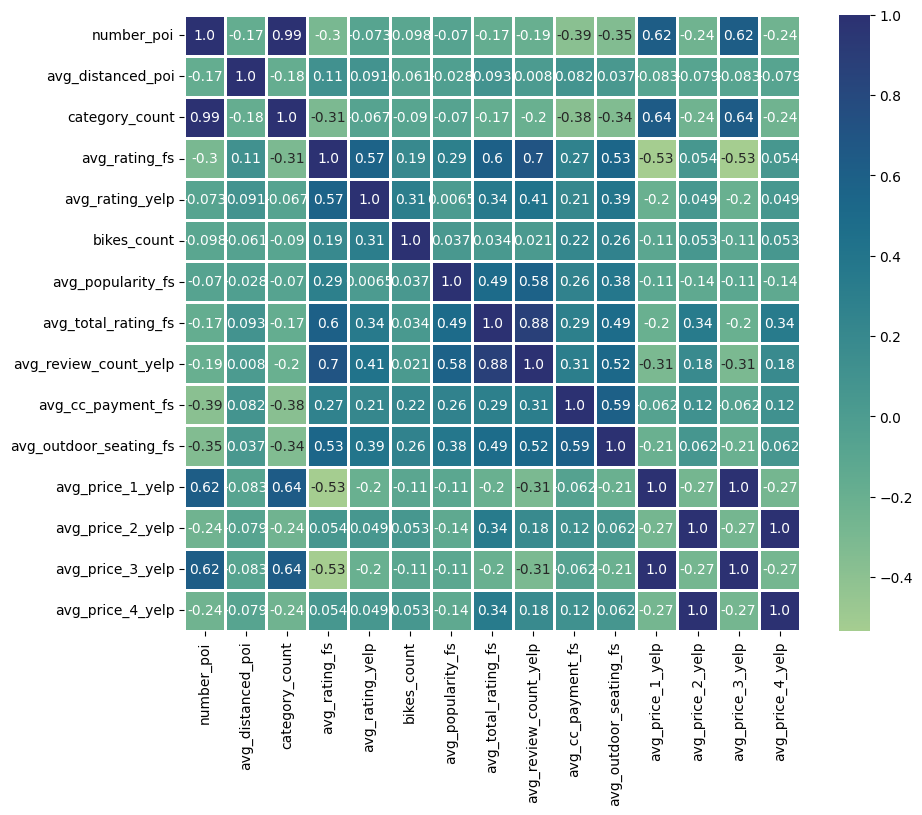

In [42]:
# coorelation heatmap

plt.figure(figsize=(10, 8))

sns.heatmap(
    revised_data.corr(numeric_only=True),
    annot=True,
    cmap='crest',
    fmt='0.2',
    linewidths=1,
    square=True)

plt.show()

In [ ]:
# Define predictors and target variable
X = revised_data[['number_poi', 'avg_distanced_poi',
       'category_count', 'avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_total_rating_fs', 'avg_review_count_yelp',
       'avg_cc_payment_fs', 'avg_outdoor_seating_fs', 'avg_price_1_yelp',
       'avg_price_2_yelp', 'avg_price_3_yelp', 'avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)



In [ ]:
# Define predictors and target variable
X = revised_data[['avg_distanced_poi',
       'category_count', 'avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_total_rating_fs', 'avg_review_count_yelp',
       'avg_cc_payment_fs', 'avg_outdoor_seating_fs', 'avg_price_1_yelp',
       'avg_price_2_yelp', 'avg_price_3_yelp', 'avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)



In [ ]:
# Define predictors and target variable
X = revised_data[['avg_distanced_poi','avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_total_rating_fs', 'avg_review_count_yelp',
       'avg_cc_payment_fs', 'avg_outdoor_seating_fs', 'avg_price_1_yelp',
       'avg_price_2_yelp', 'avg_price_3_yelp', 'avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)



In [ ]:
# Define predictors and target variable
X = revised_data[['avg_distanced_poi','avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_total_rating_fs', 'avg_review_count_yelp',
       'avg_cc_payment_fs', 'avg_outdoor_seating_fs',
       'avg_price_2_yelp', 'avg_price_3_yelp', 'avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)



In [ ]:
# Define predictors and target variable
X = revised_data[['avg_distanced_poi','avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_total_rating_fs', 'avg_review_count_yelp',
       'avg_cc_payment_fs', 'avg_outdoor_seating_fs',
       'avg_price_2_yelp','avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)



In [ ]:
# Define predictors and target variable
X = revised_data[['avg_distanced_poi','avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_review_count_yelp',
       'avg_cc_payment_fs', 'avg_outdoor_seating_fs',
       'avg_price_2_yelp','avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)



In [ ]:
# Define predictors and target variable
X = revised_data[['avg_distanced_poi','avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_review_count_yelp', 'avg_outdoor_seating_fs',
       'avg_price_2_yelp','avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)


In [ ]:
# Define predictors and target variable
X = revised_data[['avg_rating_fs', 'avg_rating_yelp',
       'avg_popularity_fs', 'avg_review_count_yelp', 'avg_outdoor_seating_fs',
       'avg_price_2_yelp','avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)


In [ ]:
# Define predictors and target variable
X = revised_data[['avg_rating_yelp',
       'avg_popularity_fs', 'avg_review_count_yelp', 'avg_outdoor_seating_fs',
       'avg_price_2_yelp','avg_price_4_yelp']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)


In [53]:
# Define predictors and target variable
X = revised_data[['avg_rating_yelp', 'avg_review_count_yelp', 'avg_outdoor_seating_fs']]
y = revised_data['bikes_count']

#Defining the constant
X = sm.add_constant(X)

# linear regression model
lin_reg = sm.OLS(y,X)
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            bikes_count   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     12.76
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.14e-07
Time:                        15:57:45   Log-Likelihood:                -642.89
No. Observations:                 206   AIC:                             1294.
Df Residuals:                     202   BIC:                             1307.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12

### Model Interpretation

The model explains the dependency of bikes count by 14.70%.
- Yelp Average rating, Yelp review count and Foursquare outdoor seating features are significant features. 
- With every 1 unit increase in yelp rating and outdoor seating feature, number of bikes will increase by 5.4052 and 3.8005 respectively.
- With every 1 unit increase in yelp review count, number of bikes will decrease by -0.0080


# Stretch

### How can you turn the regression model into a classification model?

The target variable in classification model of the above regression model could be used to categorise the bike stations into busy or non-busy based on the number of free bikes available.

- The threshold of categorising the station busy could be predetermined, say it is 'n' number of bikes.

Class Busy : if bikes are below 'n'
Class Non-Busy : if bikes available are over 'n'

- The indepedent variables can be the features of the point of interest around each bike station and how do they impact the availability of free bikes.